<a href="https://colab.research.google.com/github/Cado87/Fruit-classification/blob/main/Fruit_classifier_dataset_DeepFruit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Download dataset

In [1]:
import requests

url = "https://prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com/5prc54r4rt-1.zip"
headers = {}  # Define headers as an empty dictionary
response = requests.get(url, headers=headers)

# Save the downloaded content to a file
with open("dataset.zip", "wb") as f:
    f.write(response.content)

Unzip file

In [2]:
import zipfile
import os

# Specify the path to the downloaded zip file
zip_file_path = "dataset.zip"

# Specify the directory where you want to extract the contents
extract_dir = "extracted_dataset"

# Create the extraction directory if it doesn't exist
os.makedirs(extract_dir, exist_ok=True)

# Open the zip file and extract its contents
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"File '{zip_file_path}' unzipped to '{extract_dir}'")

File 'dataset.zip' unzipped to 'extracted_dataset'


Analize labels

In [3]:
import pandas as pd
import os

labels_train_path = "/content/extracted_dataset/DeepFruits Dataset of Fruits Images with different combinations for Fruit Recognition and Calories Estimation/Labels_Train.csv"
labels_test_path = "/content/extracted_dataset/DeepFruits Dataset of Fruits Images with different combinations for Fruit Recognition and Calories Estimation/Labels_Test.csv"

# Load the CSV files
labels_train_df = pd.read_csv(labels_train_path)
labels_test_df = pd.read_csv(labels_test_path)

# Combine the dataframes
all_labels_df = pd.concat([labels_train_df, labels_test_df])

# Get the list of fruit columns (excluding 'FileName')
fruit_columns = all_labels_df.columns.tolist()
fruit_columns.remove('FileName')

# Calculate the sum of '1's for each fruit column
label_counts = all_labels_df[fruit_columns].sum()

print("Label counts in the dataset:")
display(label_counts)

print(f"\nTotal number of classes: {len(fruit_columns)}")

Label counts in the dataset:


,0
Mango,4357
Grape,4840
Plum,4867
Kiwi,4867
Pear,5407
Apple,5270
Orange,5243
Banana,5243
Pomegranate,5243
Strawberry,5270



Total number of classes: 20


Check folders and images inside

In [4]:
import os

dataset_path = "/content/extracted_dataset/DeepFruits Dataset of Fruits Images with different combinations for Fruit Recognition and Calories Estimation"
folders_to_check = [
    os.path.join(dataset_path, "Fruits_Dataset_Train"),
    os.path.join(dataset_path, "Fruits_Dataset_Test")
]

image_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.gif']
total_image_count = 0

for folder_path in folders_to_check:
    if os.path.isdir(folder_path):
        print(f"Checking folder: {folder_path}")
        for subfolder_name in os.listdir(folder_path):
            subfolder_path = os.path.join(folder_path, subfolder_name)
            if os.path.isdir(subfolder_path):
                image_count = 0
                for file_name in os.listdir(subfolder_path):
                    if any(file_name.lower().endswith(ext) for ext in image_extensions):
                        image_count += 1
                print(f"  Folder '{subfolder_name}': {image_count} images")
                total_image_count += image_count

print(f"\nTotal number of images in all checked subfolders: {total_image_count}")


Checking folder: /content/extracted_dataset/DeepFruits Dataset of Fruits Images with different combinations for Fruit Recognition and Calories Estimation/Fruits_Dataset_Train
  Folder '1': 3486 images
  Folder '6': 840 images
  Folder '2': 3808 images
  Folder '8': 840 images
  Folder '4': 3264 images
  Folder '7': 408 images
  Folder '3': 3866 images
  Folder '5': 387 images
Checking folder: /content/extracted_dataset/DeepFruits Dataset of Fruits Images with different combinations for Fruit Recognition and Calories Estimation/Fruits_Dataset_Test
  Folder '1': 871 images
  Folder '6': 210 images
  Folder '2': 952 images
  Folder '8': 210 images
  Folder '4': 816 images
  Folder '7': 102 images
  Folder '3': 966 images
  Folder '5': 96 images

Total number of images in all checked subfolders: 21122


Visualize random images

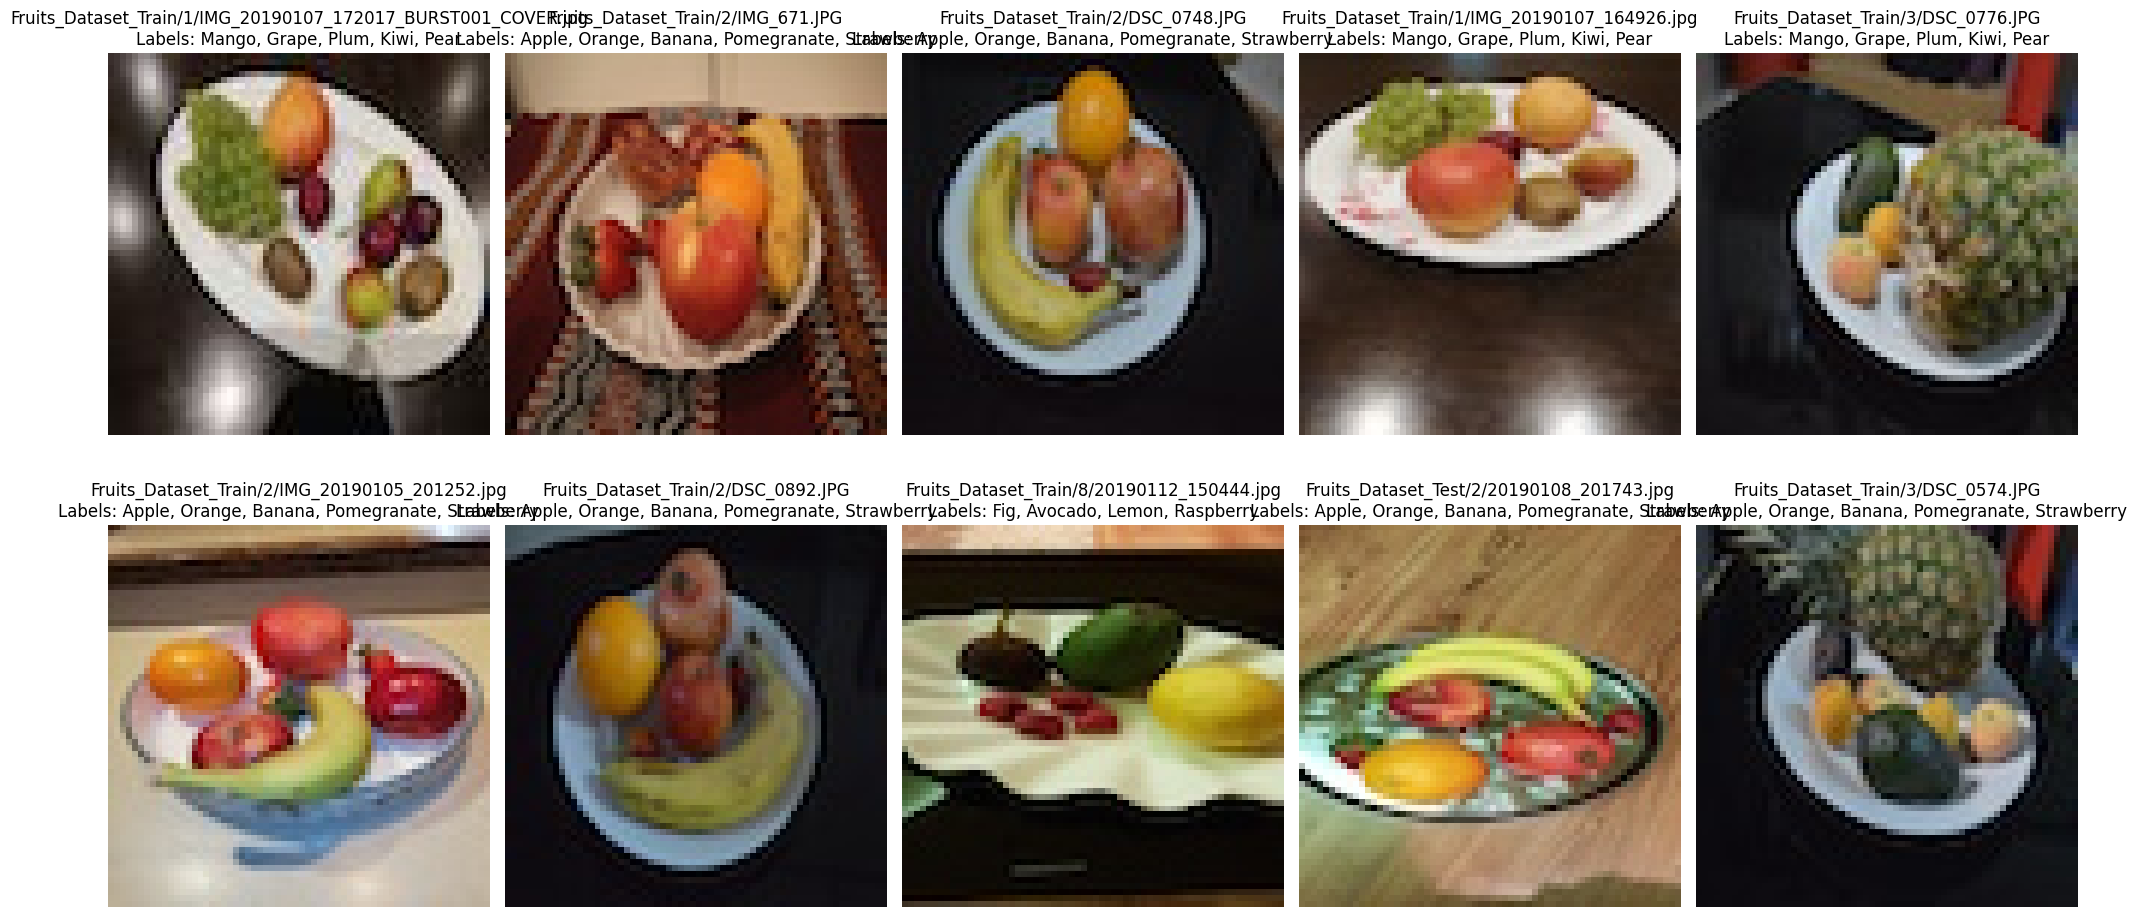

In [5]:
import matplotlib.pyplot as plt
import random
from PIL import Image
import os
import pandas as pd

all_image_files = []
for folder_path in folders_to_check:
    if os.path.isdir(folder_path):
        for subfolder_name in os.listdir(folder_path):
            subfolder_path = os.path.join(folder_path, subfolder_name)
            if os.path.isdir(subfolder_path):
                for file_name in os.listdir(subfolder_path):
                    if any(file_name.lower().endswith(ext) for ext in image_extensions):
                        all_image_files.append(os.path.join(subfolder_path, file_name))

# Shuffle the list of all image files
random.shuffle(all_image_files)

n_images_to_display = 10
plt.figure(figsize=(20, 10))

# Select the first n_images_to_display from the shuffled list
images_to_display = all_image_files[:n_images_to_display]

for i, image_path in enumerate(images_to_display):
    img = Image.open(image_path)
    ax = plt.subplot(2, 5, i + 1) # Arrange images in a 2x5 grid
    ax.imshow(img)

    # Get the filename from the image path
    file_name = os.path.basename(image_path)

    # Find the row in the labels DataFrame that matches the filename
    label_row = all_labels_df[all_labels_df['FileName'] == file_name]

    # Get the labels for this image
    labels = []
    if not label_row.empty:
        # Get the list of fruit columns (excluding 'FileName')
        fruit_columns = all_labels_df.columns.tolist()
        fruit_columns.remove('FileName')
        for fruit_col in fruit_columns:
            if label_row[fruit_col].iloc[0] == 1:
                labels.append(fruit_col)

    # Create the title with grandparent, parent, filename, and labels
    grandparent_folder = os.path.basename(os.path.dirname(os.path.dirname(image_path)))
    parent_folder = os.path.basename(os.path.dirname(image_path))
    title = f"{grandparent_folder}/{parent_folder}/{file_name}\nLabels: {', '.join(labels) if labels else 'None'}"

    ax.set_title(title)
    ax.axis('off')

plt.tight_layout()
plt.show()